In [12]:
# initialization

from alpha_vantage.timeseries import TimeSeries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

# load variables from .env
load_dotenv()

api_key = os.getenv("ALPHA_VANTAGE_API_KEY")

ts = TimeSeries(key = api_key, output_format = 'pandas')

In [ ]:
# # yfinance input 

# tickers = ["^GSPC", "IEF", "GLD"]
# start_date = "2018-01-01"
# end_date = "2025-01-01"

# data = yf.download(tickers, start = start_date, end = end_date)["Adj Close"]
# data.columns = ["S&P 500", "Treasury Bonds", "Gold"]
# data.head(10)

In [18]:
# Retrieve SPY dataframe
data, meta_data = ts.get_daily(symbol = "SPY", outputsize = "full")

# Rename columns and ensure index is the Date
data.columns = ["Open", "High", "Low", "Close", "Volume"]
data.index = pd.to_datetime(data.index)

data.head(10)

,Open,High,Low,Close,Volume
date,,,,,
2025-07-18,629.30,629.4700,626.4600,627.58,65621645.0
2025-07-17,624.40,628.4048,624.1800,628.04,68885683.0
2025-07-16,623.74,624.7300,618.0500,624.22,88987511.0
2025-07-15,627.52,627.8600,622.0600,622.14,74317260.0
2025-07-14,623.16,625.1581,621.7999,624.81,51898518.0
2025-07-11,622.74,624.8600,621.5300,623.62,63670226.0
2025-07-10,624.20,626.8701,623.0100,625.82,57528960.0
2025-07-09,622.77,624.7200,620.9105,624.06,66113326.0
2025-07-08,621.35,622.1100,619.5200,620.34,59024585.0


In [20]:
# Sort dataframe 
data.sort_index(inplace = True)

# Date range
start_date = "2018-01-01"
end_date = "2025-01-01"

# Filter dataframe by date
filtered_data = data.loc[start_date:end_date]

# Check for missing values
filtered_data.isnull().sum()

filtered_data

,Open,High,Low,Close,Volume
date,,,,,
2018-01-02,267.840,268.8100,267.4000,268.77,86655749.0
2018-01-03,268.960,270.6400,268.9600,270.47,90070416.0
2018-01-04,271.200,272.1600,270.5400,271.61,80636408.0
2018-01-05,272.510,273.5600,271.9500,273.42,83523995.0
2018-01-08,273.310,274.1000,272.9800,273.92,57319192.0
...,...,...,...,...,...
2024-12-24,596.060,601.3400,595.4700,601.30,33160097.0
2024-12-26,599.500,602.4800,598.0825,601.34,41338891.0
2024-12-27,597.540,597.7761,590.7647,595.01,64969310.0


In [32]:


# Modifying a slice of the dataframe to show 50 day moving average.

# filtered_data = filtered_data.copy()
# filtered_data["SMA_50"] = filtered_data["Close"].rolling(window = 50).mean()

filtered_data.loc[:, "SMA_50"] = filtered_data["Close"].rolling(window = 50).mean()

filtered_data.tail()

,Open,High,Low,Close,Volume,SMA_50
date,,,,,,
2024-12-24,596.060,601.3400,595.4700,601.30,33160097.0,591.9854
2024-12-26,599.500,602.4800,598.0825,601.34,41338891.0,592.4166
2024-12-27,597.540,597.7761,590.7647,595.01,64969310.0,592.6708
2024-12-30,587.890,591.7400,584.4100,588.22,56578757.0,592.7882
2024-12-31,589.905,590.6399,584.4200,586.08,57052654.0,592.8180


In [34]:
# Adding the signal column 

filtered_data.loc[:, "Signal"] = (filtered_data["Close"] > filtered_data["SMA_50"]).astype(int)

filtered_data.tail()

,Open,High,Low,Close,Volume,SMA_50,Signal
date,,,,,,,
2024-12-24,596.060,601.3400,595.4700,601.30,33160097.0,591.9854,1
2024-12-26,599.500,602.4800,598.0825,601.34,41338891.0,592.4166,1
2024-12-27,597.540,597.7761,590.7647,595.01,64969310.0,592.6708,1
2024-12-30,587.890,591.7400,584.4100,588.22,56578757.0,592.7882,0
2024-12-31,589.905,590.6399,584.4200,586.08,57052654.0,592.8180,0


In [ ]:
# Adding pct change of daily close prices
filtered_data.loc[:, "Daily_Return"] = filtered_data["Close"].pct_change()

filtered_data.head()

,Open,High,Low,Close,Volume,SMA_50,Signal,Daily_Return
date,,,,,,,,
2018-01-02,267.84,268.81,267.40,268.77,86655749.0,NaN,0,NaN
2018-01-03,268.96,270.64,268.96,270.47,90070416.0,NaN,0,0.006325
2018-01-04,271.20,272.16,270.54,271.61,80636408.0,NaN,0,0.004215
2018-01-05,272.51,273.56,271.95,273.42,83523995.0,NaN,0,0.006664
2018-01-08,273.31,274.10,272.98,273.92,57319192.0,NaN,0,0.001829


In [ ]:
# Simulating the strategy's return
# Shift to ensure return is based on previous days signal

filtered_data.loc[:, "Strategy_Return"] = filtered_data["Signal"].shift(1) * filtered_data["Daily_Return"]

filtered_data.tail()

,Open,High,Low,Close,Volume,SMA_50,Signal,Daily_Return,Strategy_Return
date,,,,,,,,,
2024-12-24,596.060,601.3400,595.4700,601.30,33160097.0,591.9854,1,0.011115,0.011115
2024-12-26,599.500,602.4800,598.0825,601.34,41338891.0,592.4166,1,0.000067,0.000067
2024-12-27,597.540,597.7761,590.7647,595.01,64969310.0,592.6708,1,-0.010526,-0.010526
2024-12-30,587.890,591.7400,584.4100,588.22,56578757.0,592.7882,0,-0.011412,-0.011412
2024-12-31,589.905,590.6399,584.4200,586.08,57052654.0,592.8180,0,-0.003638,-0.000000


In [40]:
# Cumulative returns to compare Buy and Hold vs Strategy

filtered_data.loc[:, "Cum_BuyHold"] = (1 + filtered_data["Daily_Return"]).cumprod()
filtered_data.loc[:, "Cum_Strategy"] = (1 + filtered_data["Strategy_Return"]).cumprod()

filtered_data


,Open,High,Low,Close,Volume,SMA_50,Signal,Daily_Return,Strategy_Return,Cum_BuyHold,Cum_Strategy
date,,,,,,,,,,,
2018-01-02,267.840,268.8100,267.4000,268.77,86655749.0,NaN,0,NaN,NaN,NaN,NaN
2018-01-03,268.960,270.6400,268.9600,270.47,90070416.0,NaN,0,0.006325,0.000000,1.006325,1.000000
2018-01-04,271.200,272.1600,270.5400,271.61,80636408.0,NaN,0,0.004215,0.000000,1.010567,1.000000
2018-01-05,272.510,273.5600,271.9500,273.42,83523995.0,NaN,0,0.006664,0.000000,1.017301,1.000000
2018-01-08,273.310,274.1000,272.9800,273.92,57319192.0,NaN,0,0.001829,0.000000,1.019161,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,596.060,601.3400,595.4700,601.30,33160097.0,591.9854,1,0.011115,0.011115,2.237229,1.687549
2024-12-26,599.500,602.4800,598.0825,601.34,41338891.0,592.4166,1,0.000067,0.000067,2.237378,1.687661
2024-12-27,597.540,597.7761,590.7647,595.01,64969310.0,592.6708,1,-0.010526,-0.010526,2.213826,1.669896


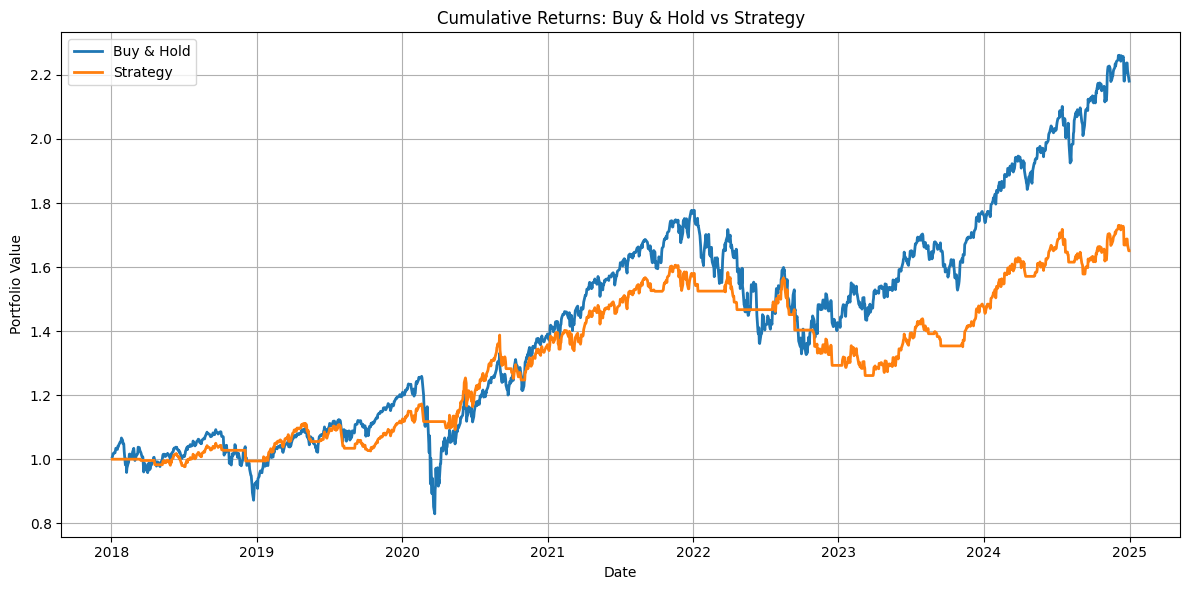

In [41]:
# Plot 
plt.figure(figsize = (12, 6))
plt.plot(filtered_data["Cum_BuyHold"], label = "Buy & Hold", linewidth = 2)
plt.plot(filtered_data["Cum_Strategy"], label = "Strategy", linewidth = 2)
plt.title("Cumulative Returns: Buy & Hold vs Strategy")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()